In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [5]:
#Check if format of input data is correct
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

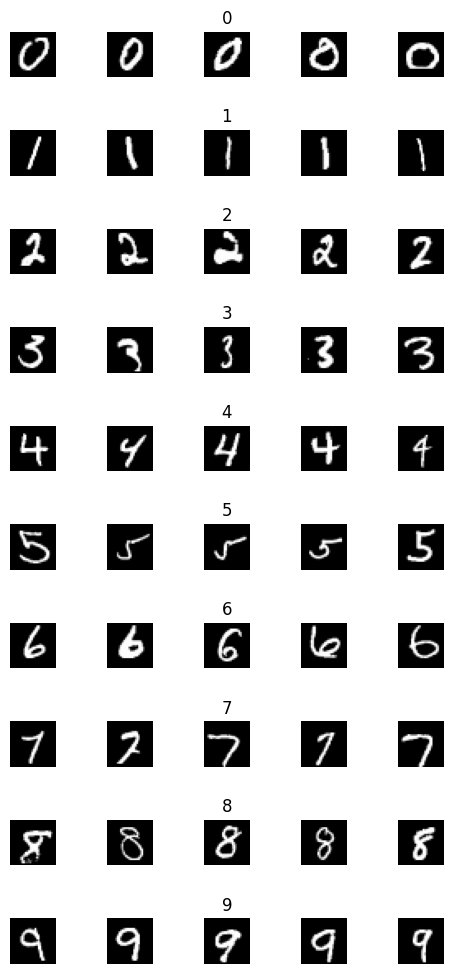

In [6]:
# To illustrate the dataset
num_of_samples = []

cols=5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1),:,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


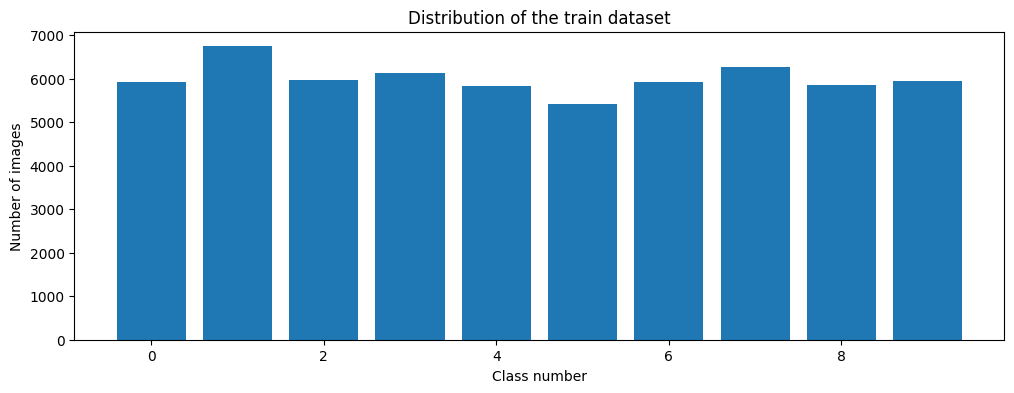

In [7]:
#Frequency distribution
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title('Distribution of the train dataset')
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
num_pixels = 784 #28x28
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

In [11]:
#Simple fully connected perceptron-based model
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes,activation="softmax"))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
model = create_model()
print(model.summary())

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


2024-10-25 14:04:38.077197: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-25 14:04:38.077552: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
h = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10


2024-10-25 14:04:38.540348: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


  8/270 [..............................] - ETA: 2s - loss: 2.2103 - accuracy: 0.1887  

2024-10-25 14:04:38.754259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


270/270 [==============================] - 2s 7ms/step - loss: 0.6608 - accuracy: 0.8021 - val_loss: 0.3266 - val_accuracy: 0.9080
Epoch 2/10
  1/270 [..............................] - ETA: 1s - loss: 0.4906 - accuracy: 0.8950

2024-10-25 14:04:40.699772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


270/270 [==============================] - 2s 7ms/step - loss: 0.3589 - accuracy: 0.8968 - val_loss: 0.2716 - val_accuracy: 0.9228
Epoch 3/10
270/270 [==============================] - 2s 7ms/step - loss: 0.3177 - accuracy: 0.9084 - val_loss: 0.2509 - val_accuracy: 0.9273
Epoch 4/10
270/270 [==============================] - 2s 7ms/step - loss: 0.2899 - accuracy: 0.9172 - val_loss: 0.2357 - val_accuracy: 0.9315
Epoch 5/10
270/270 [==============================] - 2s 8ms/step - loss: 0.2690 - accuracy: 0.9224 - val_loss: 0.2244 - val_accuracy: 0.9358
Epoch 6/10
270/270 [==============================] - 2s 7ms/step - loss: 0.2523 - accuracy: 0.9279 - val_loss: 0.2256 - val_accuracy: 0.9348
Epoch 7/10
270/270 [==============================] - 2s 7ms/step - loss: 0.2447 - accuracy: 0.9291 - val_loss: 0.2250 - val_accuracy: 0.9393
Epoch 8/10
270/270 [==============================] - 2s 7ms/step - loss: 0.2350 - accuracy: 0.9309 - val_loss: 0.2183 - val_accuracy: 0.9392
Epoch 9/10
270/27

Text(0.5, 0, 'Epochs')

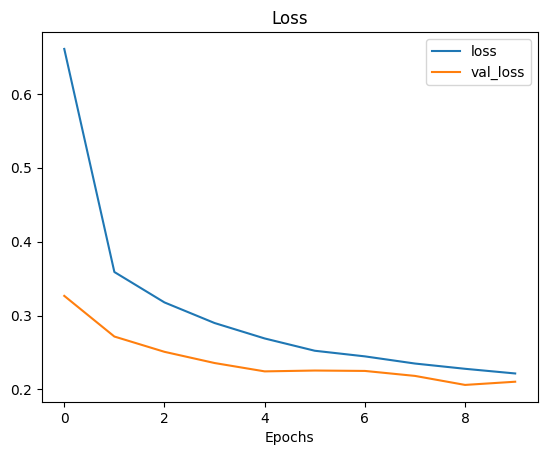

In [14]:
# Loss plot
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epochs')

Text(0.5, 0, 'Epochs')

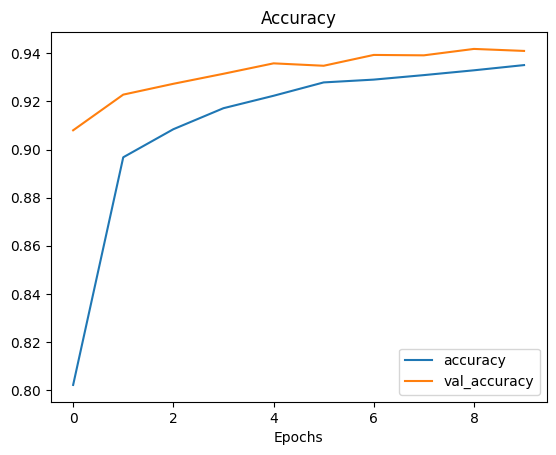

In [15]:
# Accuracy plot
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

2024-10-25 14:04:59.179802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<class 'list'>
Test score: 0.24546870589256287
Test accuracy: 0.9338000416755676


<Response [200]>


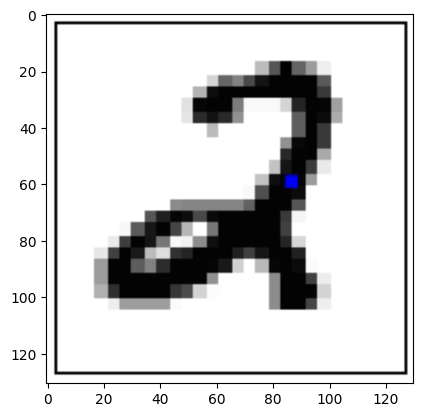

In [17]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

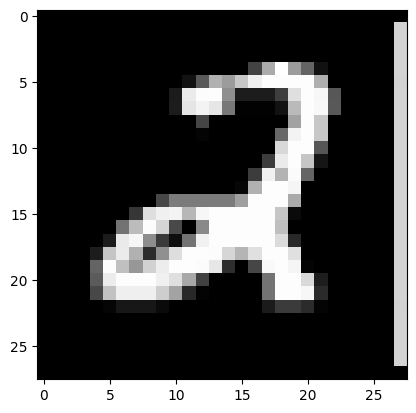

In [18]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [19]:
image = image / 255
image = image.reshape(1,784)

In [20]:
prediction = np.argmax(model.predict(image))
print('Predicted digit:',prediction)

1/1 [==============================] - 0s 87ms/step
Predicted digit: 2


2024-10-25 14:05:01.626284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
